In [525]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [526]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


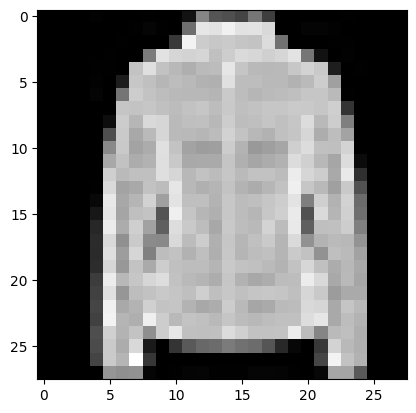

label is Shirt


In [527]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

Final Loss Value (Train) = 5.16%
Final Loss Value (Test) = 6.80%
Norm of W = 1404179381.0000002


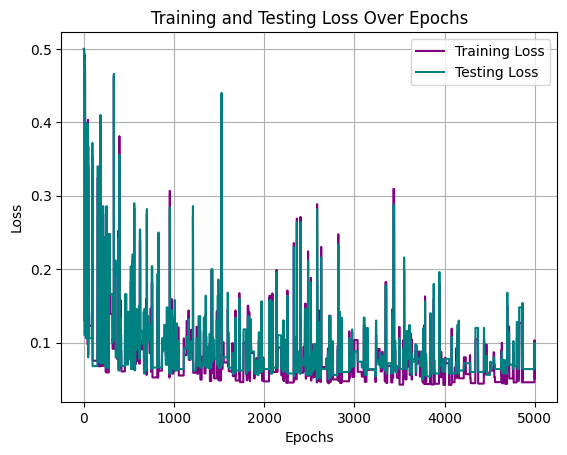

In [528]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #
test_loss_hist = []
W = W.flatten()
for i in range(N):
    x_i = X_train_h[i]
    y_i = y_train[i]
    y_pred = np.sign(np.dot(W, X_train_h[i]))
    if (y_pred != y_train[i]):
        W += y_train[i]* X_train_h[i]

        missclassified_train = 0
        missclassified_test = 0

        for j in range(N):
            train_pred = np.sign(np.dot(W, X_train_h[j]))
            if (train_pred != y_train[j]):
                missclassified_train += 1

        for k in range(N_test):
            test_pred = np.sign(np.dot(W, X_test_h[k]))
            if (test_pred != y_test[k]):
                missclassified_test += 1

        loss_hist.append(missclassified_train/N)
        test_loss_hist.append(missclassified_test/N_test)

    else:
        loss_hist.append(loss_hist[-1])
        test_loss_hist.append(test_loss_hist[-1])

# Print final losses
print(f'Final Loss Value (Train) = {loss_hist[-1]*100:.2f}%')
print(f'Final Loss Value (Test) = {test_loss_hist[-1]*100:.2f}%')
print(f'Norm of W = {np.linalg.norm(W)**2}')

# Plotting
plt.grid(True)
plt.plot(loss_hist, 'purple', label='Training Loss')
plt.plot(test_loss_hist, 'teal', label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [529]:
from codes.Logistic import Logistic

In [530]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599917
188442.90860327013


In [ ]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

5.0 %


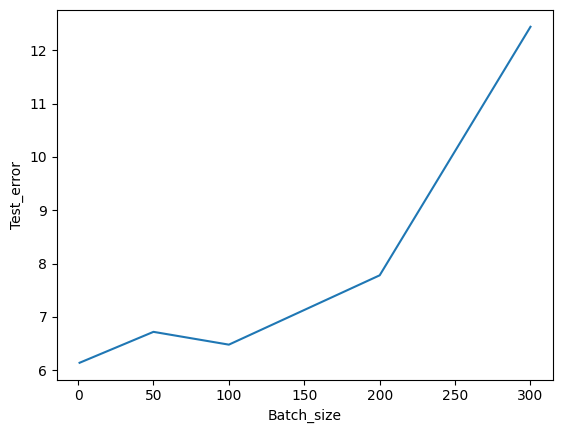

In [ ]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Average the test error over 10 times
# ================================================================ #

iters = 10
count = 0
for b in Batch:
    temp_err = 0
    for i in range(iters):
        logistic = Logistic(d = d)
        loss_hist, w = logistic.train_LR(X_train,y_train, eta=1e-5,batch_size=b, num_iters=6000/b)
        y_pred = logistic.predict(X_test)
        temp_err += np.sum((y_test!=y_pred))*100/X_test.shape[0]
            
    temp_err /= iters
    test_err[count] = temp_err
    count += 1

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [ ]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


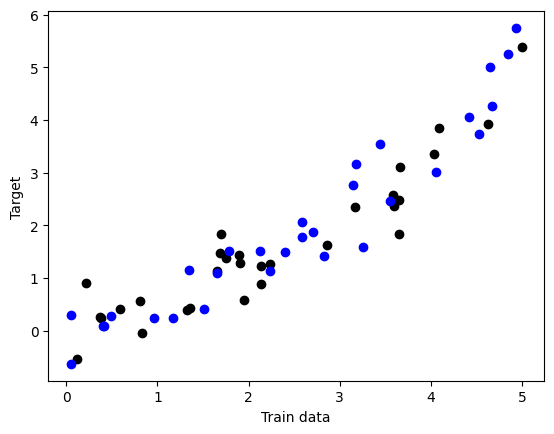

In [ ]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [ ]:
from codes.Regression import Regression

In [ ]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.282380633012861
Gradient value [ -3.19217252 -10.44504584]


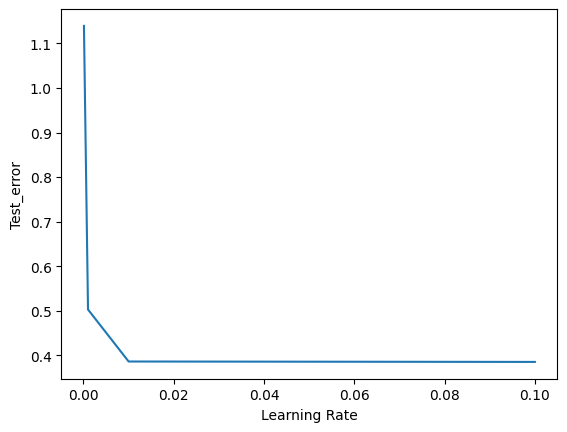

In [ ]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Linear regression for different learning rates and average the test error over 10 times
# ================================================================ #
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))  # This will store the average test error for each learning rate

# Loop over each learning rate
for index, eta in enumerate(lrs):
    errors = []  # To store the test errors for averaging

    # Repeat training and testing 10 times for each learning rate
    for _ in range(10):
        regression = Regression(m=1)  # Initialize the Regression object for linear regression
        # Train the model using the current learning rate
        regression.train_LR(X_train, y_train, eta=eta, batch_size=30, num_iters=1000)
        
        # Predict on test data
        y_pred = regression.predict(X_test)
        
        # Calculate the mean squared error for the test data
        error = np.mean((y_test - y_pred) ** 2)
        errors.append(error)

    # Average the test errors and store them
    test_err[index] = np.mean(errors)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [ ]:
## PART (e): 
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.26417938203964436
Optimal solution gradient [-0.37906992  0.8852483 ]


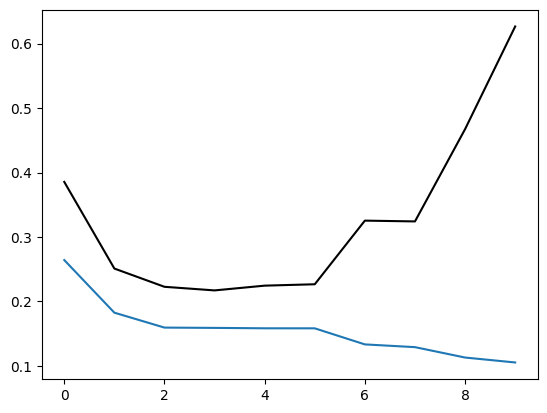

In [ ]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for m in range(1,11):
    regression = Regression(m=m, reg_param=0)
    loss, w = regression.closed_form(X_train, y_train)
    train_loss[m-1] = loss
    y_pred = regression.predict(X_test)
    temp_loss = 0
    for i in range(X_test.shape[0]):
        temp_loss += (y_pred[i]-y_test[i])**2
    temp_loss /= X_test.shape[0]
    test_loss[m-1] = temp_loss

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

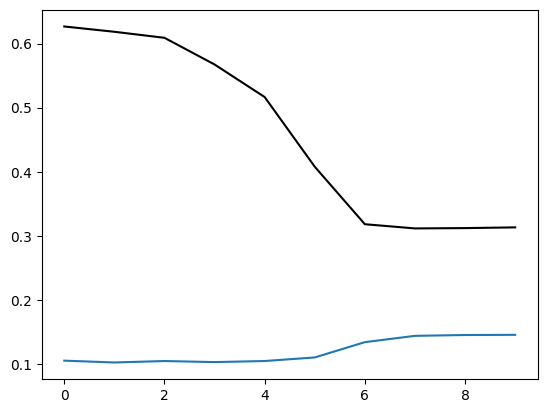

In [ ]:
#PART (i): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
lambdas = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
count = 0
for la in lambdas:
    regression = Regression(m=10, reg_param=la)
    loss, w = regression.closed_form(X_train, y_train)
    y_pred = regression.predict(X_test)
    temp_loss = 0
    for i in range(X_test.shape[0]):
        temp_loss += (y_pred[i]-y_test[i])**2
    temp_loss /= X_test.shape[0]
    train_loss[count] = loss
    test_loss[count] = temp_loss
    count += 1
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()